Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [3]:
boston = load_boston()
data = boston.data
feature_names = boston.feature_names

In [4]:
X = pd.DataFrame(data, columns=feature_names)
y = boston.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [7]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

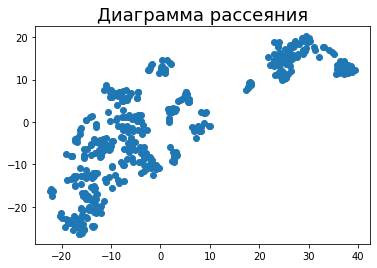

In [8]:
title_font = {
    "fontsize": 18,
    "color": "#000000",
}

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.title("Диаграмма рассеяния", fontdict=title_font)
plt.show()

Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.


In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=100)
labels_train = kmeans.fit_predict(X_train_scaled)
pd.value_counts(labels_train)

0    191
1    127
2     86
dtype: int64

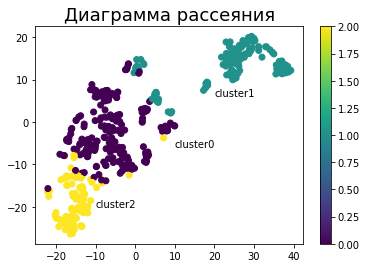

In [10]:
title_font = {
    "fontsize": 18,
    "color": "#000000",
}

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.title("Диаграмма рассеяния", fontdict=title_font)
plt.colorbar()
plt.text(10, -6, 'cluster0')
plt.text(20, 6, 'cluster1')
plt.text(-10, -20, 'cluster2')
plt.show()

In [11]:
def print_price_crim_mean(X_data, y_data, labels_data):
    """Выводит среднее значения признаков PRICE, CRIM по кластерам labels_data """
    X_data['PRICE'] = y_data
    return X_data[['PRICE', 'CRIM']].groupby([labels_data]).mean()
       
print_price_crim_mean(X_train, y_train, labels_train)

/home/oleg_rev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PRICE,CRIM
0,24.958115,0.421660
1,16.165354,10.797028
2,27.788372,0.073566


In [12]:
X_train[['CRIM']].groupby([labels_train]).max()

,CRIM
0,2.92400
1,88.97620
2,0.36894


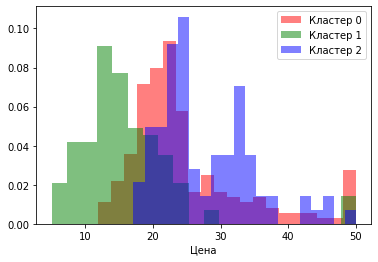

In [13]:
plt.hist(y_train[labels_train == 0], bins=20, density=True, alpha=0.5, color='r')
plt.hist(y_train[labels_train == 1], bins=20, density=True, alpha=0.5, color='g')
plt.hist(y_train[labels_train == 2], bins=20, density=True, alpha=0.5, color='b')

plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')

plt.show()

Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [14]:
labels_test = kmeans.predict(X_test_scaled)
pd.value_counts(labels_test)

0    51
1    35
2    16
dtype: int64

In [15]:
print_price_crim_mean(X_test, y_test, labels_test)

/home/oleg_rev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PRICE,CRIM
0,21.860784,0.266079
1,16.437143,10.165531
2,31.350000,0.062060


In [16]:
X_test[['CRIM']].groupby([labels_test]).max()

,CRIM
0,1.23247
1,45.74610
2,0.16211


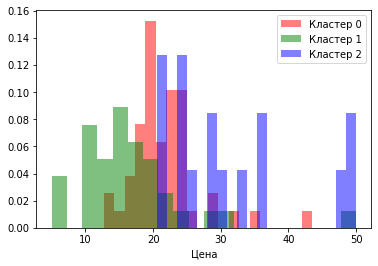

In [17]:
plt.hist(y_test[labels_test == 0], bins=20, density=True, alpha=0.5, color='r')
plt.hist(y_test[labels_test == 1], bins=20, density=True, alpha=0.5, color='g')
plt.hist(y_test[labels_test == 2], bins=20, density=True, alpha=0.5, color='b')

plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')

plt.show()